In [ ]:
from rdkit import Chem
from rdkit import RDLogger
from rdkit.Chem import AllChem

# RDLogger.DisableLog('rdApp.*')  # silence RDKit


def mol_from_smiles(smiles):
    return Chem.MolFromSmiles(smiles)


mol = mol_from_smiles("CCO")

In [ ]:
# rxn = AllChem.ReactionFromSmarts('[C:1](=O)[O:2][C:3]>>[C:1](=O)[O-].[C:3][OH]')
rxn = AllChem.ReactionFromSmarts('2Na.[Cl][Cl]>>2NaCl')


def run_reaction(mol, rxn):
    products = rxn.RunReactants((mol,))
    return [Chem.MolToSmiles(prod[0]) for prod in products]

AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'ReactionFromSmiles'

In [22]:
AllChem.ReactionFromSmarts(Chem.MolFromSmiles('[Na].[Cl][Cl]>>[Na+].[Cl-]'))

RuntimeError: Pre-condition Violation
	null SMARTS string
	Violation occurred on line 302 in file Code/GraphMol/ChemReactions/Wrap/rdChemReactions.cpp
	Failed Expression: smarts
	RDKIT: 2025.03.3
	BOOST: 1_85


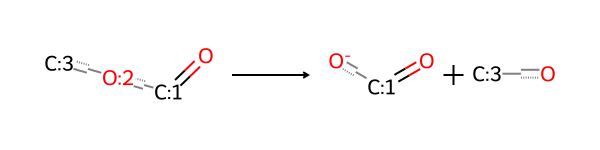

In [9]:
rxn

In [ ]:
def retrosynthesis(target_smiles, reactant_pool, reaction_rules, max_depth=5):
    from collections import deque

    visited = set()
    queue = deque()
    queue.append((target_smiles, []))  # (current molecule, path)

    for depth in range(max_depth):
        next_queue = deque()
        while queue:
            mol_smiles, path = queue.popleft()
            if mol_smiles in reactant_pool:
                return path + [(mol_smiles, None)]  # Found a match
            if mol_smiles in visited:
                continue
            visited.add(mol_smiles)

            mol = Chem.MolFromSmiles(mol_smiles)
            for rule in reaction_rules:
                try:
                    products = rule.RunReactants((mol,))
                    for prod_tuple in products:
                        for prod in prod_tuple:
                            new_smiles = Chem.MolToSmiles(prod, isomericSmiles=True)
                            next_queue.append((new_smiles, path + [(mol_smiles, rule)]))
                except:
                    continue
        queue = next_queue
    return None

In [4]:
target = 'CC(=O)OC'  # Methyl acetate
reactants = set(['CC(=O)O', 'CO'])  # Acetic acid and methanol

reaction_rules = [AllChem.ReactionFromSmarts('[C:1](=O)[O:2][C:3]>>[C:1](=O)[O-].[C:3][OH]')]

path = retrosynthesis(target, reactants, reaction_rules)
if path:
    for step in path:
        print(step)
else:
    print("No path found")

NameError: name 'AllChem' is not defined